### 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(88)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + np.random.normal(0, 1, size=100)

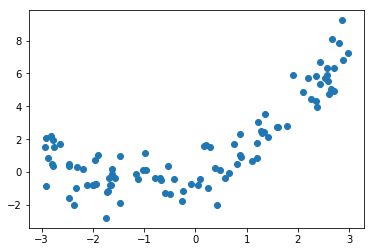

In [3]:
plt.scatter(x, y)

### 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [5]:
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.5748754809913377

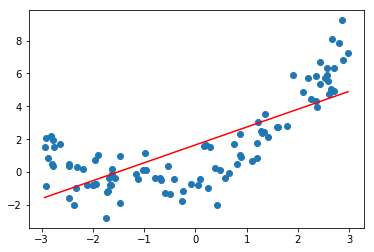

In [6]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

> 使用均方误差来衡量

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.084768395454907

### 使用多项式回归

In [9]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [10]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [11]:
poly2_reg = PolynomialRegression(degree=2)

In [12]:
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [13]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

0.952665569585901

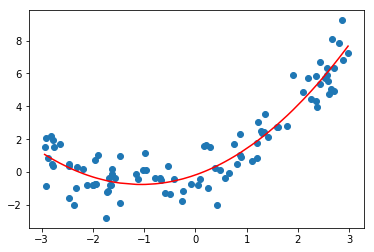

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

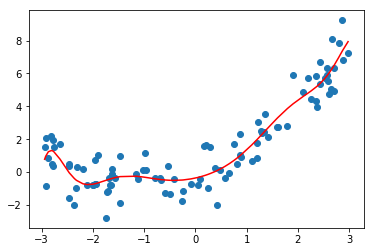

In [15]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')

### 农二夸张的

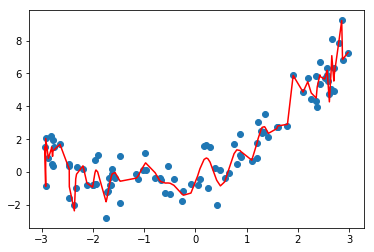

In [18]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

In [19]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

[-3, 3, -1, 10]

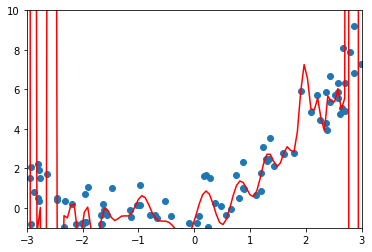

In [22]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
# 限定X轴
plt.axis([-3, 3, -1, 10])